In [3429]:
import warnings
warnings.filterwarnings('ignore')

In [3430]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3431]:
bikes = pd.read_csv('day.csv')

In [3432]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3433]:
bikes.shape

(730, 16)

In [3434]:
bikes.describe() # summary of all columns

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [3435]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3436]:
bikes["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [3437]:
bikes["yr"].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [3438]:
def ass_season(x):
    if x==1:
        return "Spring"
    elif x==2:
        return "Summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

In [3439]:
bikes["season"] = bikes["season"].apply(ass_season)

In [3440]:
bikes["season"].value_counts()

fall      188
Summer    184
Spring    180
winter    178
Name: season, dtype: int64

In [3441]:
bikes["mnth"].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [3442]:
def obj_map(x):
    return x.map({1:"jan",2:"feb",3:"mar",4:"Apr",5:"may",6:"jun", 7:"jul",8:"aug",9:"sep",10:"oct",11:"nov", 12:"Dec"})

In [3443]:
bikes[["mnth"]] = bikes[["mnth"]].apply(obj_map)

In [3444]:
bikes["mnth"].value_counts()

jan    62
oct    62
may    62
aug    62
jul    62
Dec    62
mar    62
sep    60
nov    60
jun    60
Apr    60
feb    56
Name: mnth, dtype: int64

In [3445]:
# we need to this for all variable 
def obj_map1(x):
    return x.map({1:"2019",0:"2018"})
bikes[["yr"]] = bikes[["yr"]].apply(obj_map1)

In [3446]:
bikes["yr"].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [3447]:
def obj_map2(x):
        return x.map({1:"holiday",0:"non_holiday"})
bikes[["holiday"]] = bikes[["holiday"]].apply(obj_map2)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,jan,non_holiday,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,jan,non_holiday,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,jan,non_holiday,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,jan,non_holiday,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,jan,non_holiday,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3448]:
def obj_map3(x):
        return x.map({1:"monday",0:"sunday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bikes[["weekday"]] = bikes[["weekday"]].apply(obj_map3)

In [3449]:
bikes["weekday"].value_counts()

Tuesday      105
monday       105
Wednesday    104
Friday       104
sunday       104
Saturday     104
Thursday     104
Name: weekday, dtype: int64

In [3450]:
def obj_map4(x):
        return x.map({1:"working_day",0:"non_working_day"})
bikes[["workingday"]] = bikes[["workingday"]].apply(obj_map4)

In [3451]:
bikes["workingday"].value_counts()

working_day        504
non_working_day    226
Name: workingday, dtype: int64

In [3452]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,jan,non_holiday,monday,working_day,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,jan,non_holiday,Tuesday,working_day,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,jan,non_holiday,Wednesday,working_day,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,jan,non_holiday,Thursday,working_day,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,jan,non_holiday,Friday,working_day,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3453]:
def obj_map5(x):
        return x.map({1:"Clear",2:"Mist",3:"Light Snow", 4:"Heavy Rain"})
bikes[["weathersit"]] = bikes[["weathersit"]].apply(obj_map5)

In [3454]:
bikes["weathersit"].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [3455]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,jan,non_holiday,monday,working_day,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,jan,non_holiday,Tuesday,working_day,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,jan,non_holiday,Wednesday,working_day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,jan,non_holiday,Thursday,working_day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,jan,non_holiday,Friday,working_day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3456]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

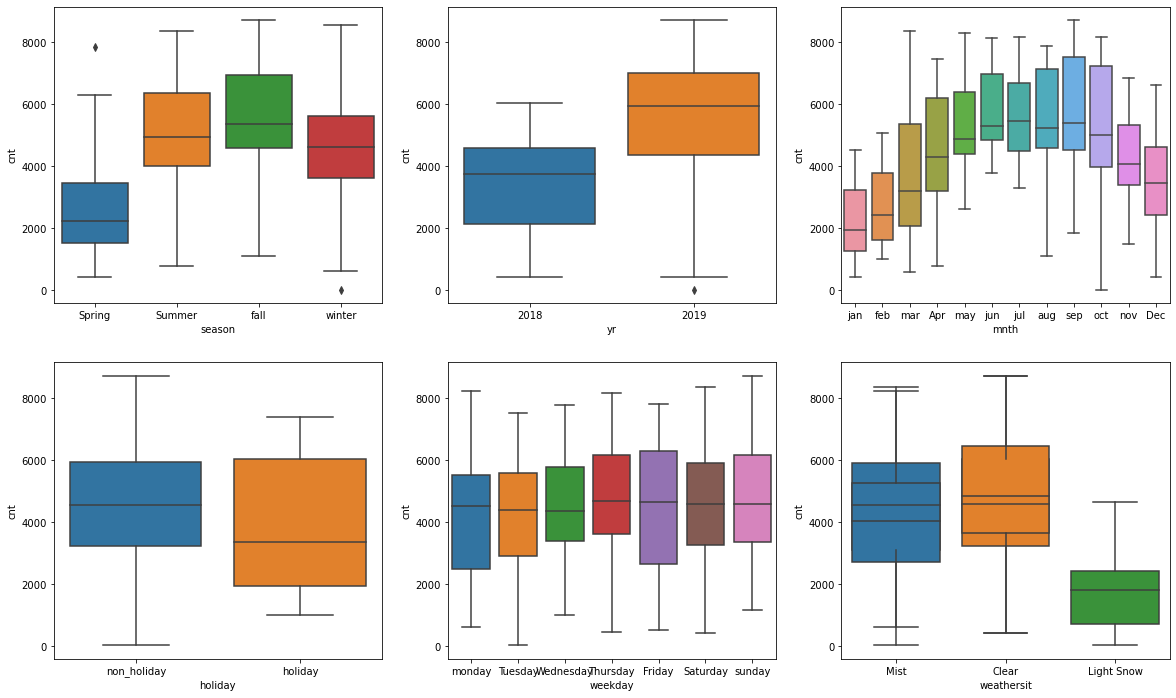

In [3457]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

#### Dropping the variables 

As you might have noticed, there are a few variables that will not help in the model building so lets drop them  

In [3458]:
bikes.drop(["instant","dteday"], axis=1 , inplace= True)

In [3459]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,jan,non_holiday,monday,working_day,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,jan,non_holiday,Tuesday,working_day,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,jan,non_holiday,Wednesday,working_day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,jan,non_holiday,Thursday,working_day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,jan,non_holiday,Friday,working_day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3460]:
bikes.drop(["casual","registered"], axis=1 , inplace= True)

#### Visualising Numerical Variables

As you might have noticed, there are a few Numericalwell. Let's make a pairplot of these variables 

In [3461]:
bikes_numeric=bikes.select_dtypes(include=np.number).columns.tolist()
bikes_numeric

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

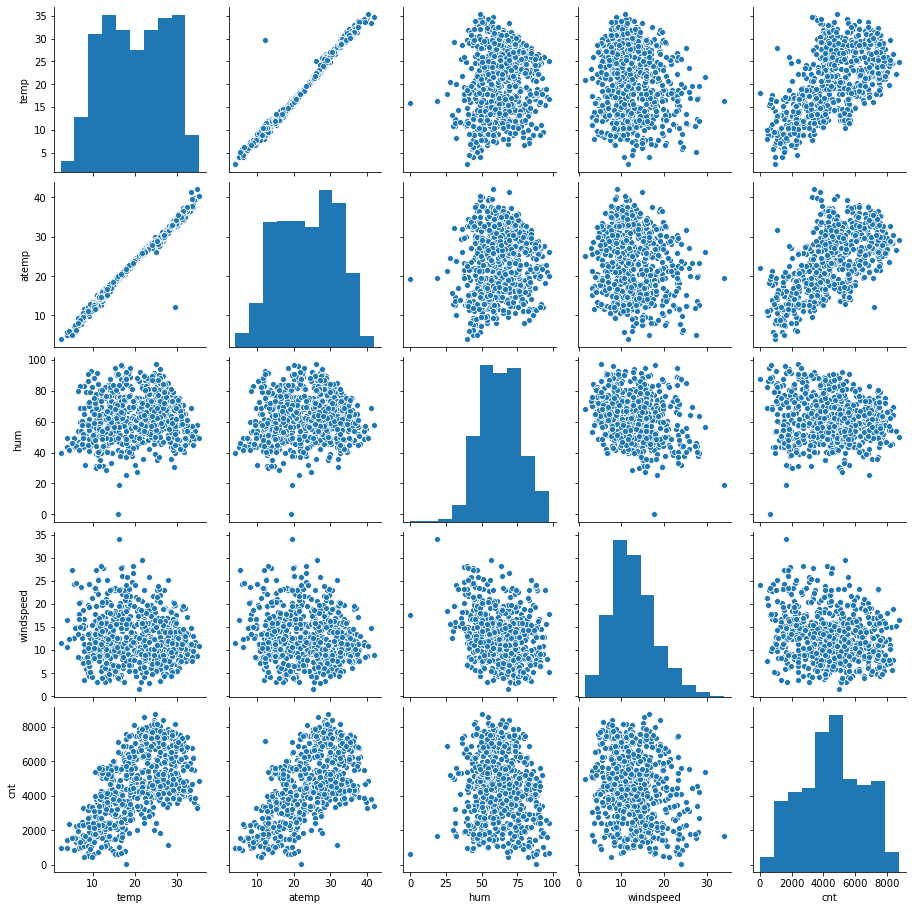

In [3462]:
sns.pairplot(bikes[bikes_numeric])

inferences to be drawn are:

1) as the temperature value increases the cnt decreases
2) ans there is no linear relationship between windspeed and cnt

In [3463]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,jan,non_holiday,monday,working_day,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,jan,non_holiday,Tuesday,working_day,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,jan,non_holiday,Wednesday,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,jan,non_holiday,Thursday,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,jan,non_holiday,Friday,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600


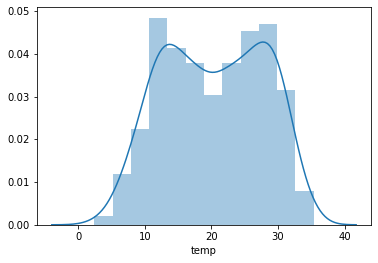

In [3464]:
sns.distplot(bikes["temp"])

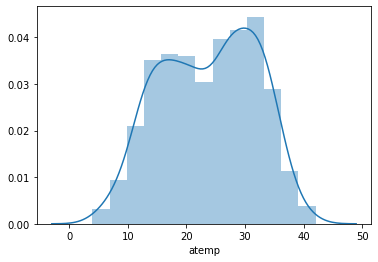

In [3465]:
sns.distplot(bikes["atemp"])

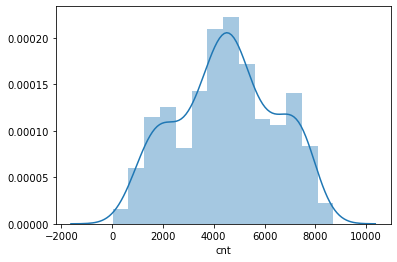

In [3466]:
sns.distplot(bikes["cnt"])

#### Visualising HeatMap for Numerical Variables 

As you might have noticed, there are a few Numerical as well. Let's make a heatmap of these variables 

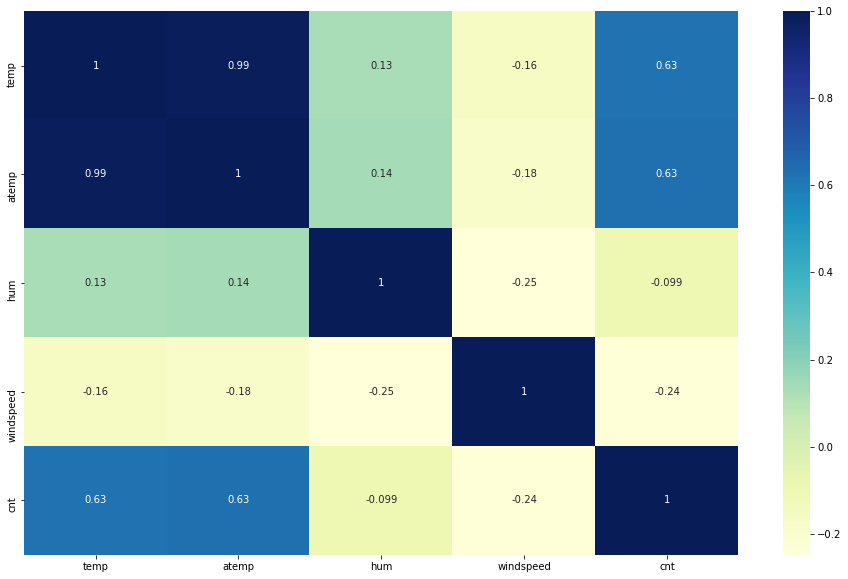

In [3467]:
plt.figure(figsize = (16, 10))
sns.heatmap(bikes[bikes_numeric].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dummy Variables

In [3468]:
status = pd.get_dummies(bikes['season'])

In [3469]:
status

,Spring,Summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
725,1,0,0,0
726,1,0,0,0
727,1,0,0,0
728,1,0,0,0


In [3470]:
bikes = pd.concat([bikes, status], axis = 1)

In [3471]:
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,fall,winter
0,Spring,2018,jan,non_holiday,monday,working_day,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,Spring,2018,jan,non_holiday,Tuesday,working_day,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,Spring,2018,jan,non_holiday,Wednesday,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,Spring,2018,jan,non_holiday,Thursday,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,Spring,2018,jan,non_holiday,Friday,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,2019,Dec,non_holiday,Friday,working_day,Mist,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0
726,Spring,2019,Dec,non_holiday,Saturday,non_working_day,Mist,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0
727,Spring,2019,Dec,non_holiday,sunday,non_working_day,Mist,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0
728,Spring,2019,Dec,non_holiday,monday,working_day,Clear,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0


In [3472]:
bikes.drop(['season'], axis = 1, inplace = True)

In [3473]:
bikes

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,fall,winter
0,2018,jan,non_holiday,monday,working_day,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,2018,jan,non_holiday,Tuesday,working_day,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,2018,jan,non_holiday,Wednesday,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,2018,jan,non_holiday,Thursday,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,2018,jan,non_holiday,Friday,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,Dec,non_holiday,Friday,working_day,Mist,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0
726,2019,Dec,non_holiday,Saturday,non_working_day,Mist,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0
727,2019,Dec,non_holiday,sunday,non_working_day,Mist,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0
728,2019,Dec,non_holiday,monday,working_day,Clear,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0


In [3474]:
status1 = pd.get_dummies(bikes['yr'])
status2=  pd.get_dummies(bikes['mnth'])
status3=  pd.get_dummies(bikes['holiday'])
status4=  pd.get_dummies(bikes['workingday'])
status5=  pd.get_dummies(bikes['weekday'])
status6=  pd.get_dummies(bikes['weathersit'])

In [3475]:
bikes = pd.concat([bikes, status1,status2,status3,status4,status5,status6], axis = 1)

In [3476]:
bikes

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Friday,Saturday,Thursday,Tuesday,Wednesday,monday,sunday,Clear,Light Snow,Mist
0,2018,jan,non_holiday,monday,working_day,Mist,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,1
1,2018,jan,non_holiday,Tuesday,working_day,Mist,14.902598,17.68695,69.6087,16.652113,...,0,0,0,1,0,0,0,0,0,1
2,2018,jan,non_holiday,Wednesday,working_day,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,2018,jan,non_holiday,Thursday,working_day,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
4,2018,jan,non_holiday,Friday,working_day,Clear,9.305237,11.46350,43.6957,12.522300,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,Dec,non_holiday,Friday,working_day,Mist,10.420847,11.33210,65.2917,23.458911,...,1,0,0,0,0,0,0,0,0,1
726,2019,Dec,non_holiday,Saturday,non_working_day,Mist,10.386653,12.75230,59.0000,10.416557,...,0,1,0,0,0,0,0,0,0,1
727,2019,Dec,non_holiday,sunday,non_working_day,Mist,10.386653,12.12000,75.2917,8.333661,...,0,0,0,0,0,0,1,0,0,1
728,2019,Dec,non_holiday,monday,working_day,Clear,10.489153,11.58500,48.3333,23.500518,...,0,0,0,0,0,1,0,1,0,0


In [3477]:
bikes.drop(['yr',"mnth","holiday","workingday","weekday","weathersit"], axis = 1, inplace = True)

In [3478]:
bikes.head()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,fall,winter,2018,...,Friday,Saturday,Thursday,Tuesday,Wednesday,monday,sunday,Clear,Light Snow,Mist
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [3479]:
bikes.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer', 'fall',
       'winter', '2018', '2019', 'Apr', 'Dec', 'aug', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'non_holiday',
       'non_working_day', 'working_day', 'Friday', 'Saturday', 'Thursday',
       'Tuesday', 'Wednesday', 'monday', 'sunday', 'Clear', 'Light Snow',
       'Mist'],
      dtype='object')

#### Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [3480]:
from sklearn.preprocessing import MinMaxScaler

In [3481]:
scaler = MinMaxScaler()

In [3482]:
df_train[bikes_numeric] = scaler.fit_transform(df_train[bikes_numeric])
df_train.head()

KeyError: "['cnt'] not in index"

In [ ]:
df_train[bikes_numeric].describe()

## Building our model

In [ ]:
bikes.columns

In [3483]:
y_train = df_train.pop('cnt')
X_train = df_train

KeyError: 'cnt'

In [3484]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3485]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.781386  , 0.83706834, 0.81219919, 0.81463604, 0.83794819])

In [3486]:
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    4.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [3487]:
# Running RFE with the output number of the variable equal to 10
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8292872865932331


In [3488]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 15),
 ('hum', False, 5),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('fall', False, 3),
 ('winter', True, 1),
 ('2018', True, 1),
 ('2019', True, 1),
 ('Apr', False, 23),
 ('Dec', False, 11),
 ('aug', False, 18),
 ('feb', False, 12),
 ('jan', False, 9),
 ('jul', False, 8),
 ('jun', False, 22),
 ('mar', False, 21),
 ('may', False, 16),
 ('nov', False, 10),
 ('oct', False, 20),
 ('sep', False, 7),
 ('non_holiday', False, 6),
 ('non_working_day', False, 2),
 ('working_day', False, 4),
 ('Friday', False, 25),
 ('Saturday', False, 13),
 ('Thursday', False, 17),
 ('Tuesday', False, 19),
 ('Wednesday', False, 24),
 ('monday', False, 26),
 ('sunday', False, 14),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [3489]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'windspeed', 'Spring', 'Summer', 'winter', '2018', '2019',
       'Clear', 'Light Snow', 'Mist'],
      dtype='object')

In [3490]:
X_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'fall', 'Apr', 'Dec', 'aug', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'non_holiday', 'non_working_day',
       'working_day', 'Friday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday',
       'monday', 'sunday'],
      dtype='object')

In [3491]:
X_train_rfe = X_train[col]

In [3492]:
X_train_rfe

,temp,windspeed,Spring,Summer,winter,2018,2019,Clear,Light Snow,Mist
653,0.509887,0.300794,0,0,1,0,1,1,0,0
576,0.815169,0.264686,0,0,0,0,1,1,0,0
426,0.442393,0.255342,1,0,0,0,1,0,0,1
728,0.245101,0.663106,1,0,0,0,1,1,0,0
482,0.395666,0.188475,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,0.824514,0.355596,0,1,0,0,1,0,0,1
578,0.863973,0.187140,0,0,0,0,1,1,0,0
53,0.202618,0.111379,1,0,0,1,0,1,0,0
350,0.248216,0.431816,0,0,1,1,0,0,0,1


In [3493]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [3494]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [3495]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.51e-180
Time:                        16:03:29   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.017      7.115      0.0

In [3496]:
X_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Summer', 'fall',
       'winter', '2018', '2019', 'Apr', 'Dec', 'aug', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'non_holiday',
       'non_working_day', 'working_day', 'Friday', 'Saturday', 'Thursday',
       'Tuesday', 'Wednesday', 'monday', 'sunday', 'Clear', 'Light Snow',
       'Mist'],
      dtype='object')

In [3497]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,2018,inf
7,2019,inf
8,Clear,inf
9,Light Snow,inf
10,Mist,inf
3,Spring,4.49
1,temp,3.30
5,winter,2.97
4,Summer,2.04
2,windspeed,1.09


In [3498]:
X_train_new = X_train_rfe.drop(["2018"], axis=1)

In [3499]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3500]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.51e-180
Time:                        16:03:39   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0769      0.023      3.336      0.0

In [3501]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3502]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.51e-180
Time:                        16:03:47   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0769      0.023      3.336      0.0

In [3503]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Clear,inf
8,Light Snow,inf
9,Mist,inf
3,Spring,4.49
1,temp,3.30
5,winter,2.97
4,Summer,2.04
2,windspeed,1.09
6,2019,1.02
0,const,0.00


In [3505]:
X_train_new = X_train_new.drop(["Clear"], axis=1)

In [3506]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3507]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.51e-180
Time:                        16:04:23   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2195      0.030      7.273      0.0

In [3508]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3509]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.51e-180
Time:                        16:04:42   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2195      0.030      7.273      0.0

In [3510]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.07
3,Spring,4.49
1,temp,3.30
5,winter,2.97
4,Summer,2.04
2,windspeed,1.09
7,Light Snow,1.05
8,Mist,1.03
6,2019,1.02


In [3512]:
X_train_new = X_train_new.drop(["const"], axis=1)

In [3513]:
lm = sm.OLS(y_train,X_train_new).fit()

In [3514]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1895.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):                        0.00
Time:                        16:05:04   Log-Likelihood:                          448.86
No. Observations:                 510   AIC:                                     -881.7
Df Residuals:                     502   BIC:                                     -847.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [3515]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.59
0,temp,3.55
5,2019,2.07
2,Spring,1.94
3,Summer,1.79
4,winter,1.60
7,Mist,1.52
6,Light Snow,1.08


In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop(["nov"], axis=1)

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
X_train_new = X_train_new.drop(["non_working_day"], axis=1)

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop(["2018"], axis=1)

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop(["Light Snow"], axis=1)

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop("const", axis=1)

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop("non_holiday", axis=1)

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop("hum", axis=1)

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop("Clear", axis=1)

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

In [ ]:
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
col1= X_train_new.columns

In [ ]:
sns.scatterplot(x=X_train_new["temp"], y=y_train)

In [ ]:
sns.scatterplot(x=X_train_new["windspeed"], y=y_train)

In [ ]:
y_pred = lm.predict(X_train_new)

In [ ]:
y_pred

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

1) it is normally Distributed 

In [ ]:
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [3516]:
df_test[bikes_numeric] = scaler.transform(df_test[bikes_numeric])
df_test.head()

KeyError: "['cnt'] not in index"

In [3517]:
y_test = df_test.pop('cnt')
X_test = df_test

KeyError: 'cnt'

In [3518]:
df_test.describe()

,temp,atemp,hum,windspeed,Spring,Summer,fall,winter,2018,2019,...,Friday,Saturday,Thursday,Tuesday,Wednesday,monday,sunday,Clear,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.255708,0.264840,0.246575,0.232877,0.520548,0.479452,...,0.132420,0.173516,0.141553,0.123288,0.155251,0.118721,0.155251,0.652968,0.027397,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.437258,0.442259,0.432005,0.423633,0.500722,0.500722,...,0.339723,0.379560,0.349389,0.329520,0.362974,0.324202,0.362974,0.477117,0.163612,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3519]:
X_test_new = X_test[X_train_new.columns]

In [3520]:
X_test_new

,temp,windspeed,Spring,Summer,winter,2019,Light Snow,Mist
184,0.831783,0.084219,0,0,0,0,0,1
535,0.901354,0.153728,0,1,0,1,0,0
299,0.511964,0.334206,0,0,1,0,0,1
221,0.881625,0.339570,0,0,0,0,0,0
152,0.817246,0.537414,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
400,0.257562,0.287411,1,0,0,1,0,1
702,0.519232,0.283397,0,0,1,1,0,0
127,0.584649,0.069510,0,1,0,0,0,0
640,0.745598,0.052115,0,0,1,1,0,1


In [3521]:
X_test_new

,temp,windspeed,Spring,Summer,winter,2019,Light Snow,Mist
184,0.831783,0.084219,0,0,0,0,0,1
535,0.901354,0.153728,0,1,0,1,0,0
299,0.511964,0.334206,0,0,1,0,0,1
221,0.881625,0.339570,0,0,0,0,0,0
152,0.817246,0.537414,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
400,0.257562,0.287411,1,0,0,1,0,1
702,0.519232,0.283397,0,0,1,1,0,0
127,0.584649,0.069510,0,1,0,0,0,0
640,0.745598,0.052115,0,0,1,1,0,1


In [3522]:
y_test_pred = lm.predict(X_test_new)

In [3523]:
y_test_pred

184    0.507850
535    0.948086
299    0.428918
221    0.579765
152    0.612708
         ...   
400    0.366533
702    0.740021
127    0.498331
640    0.858138
72     0.252252
Length: 219, dtype: float64

In [3524]:
from sklearn.metrics import r2_score

In [3525]:
r_squared= r2_score(y_test, y_test_pred)
r_squared

0.7718365956819546

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, y_test_pred))